In [1]:
!pip install control
!pip install matplotlib
!pip install numpy
!pip install spicy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 2.7 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import control as ctl
from control import (TransferFunction)

plt.rcParams['figure.figsize'] = (10,10) # tamanho do gráfico
plt.rcParams['font.size'] = 14 # tamanho da letra

t = np.linspace(0, 5, 101) # vetor tempo para o cálculo da resposta à entrada degrau

FT =
 <TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  1
-----
s + 5

Polos =

 [-5.+0.j] 

Zeros =

 [] 



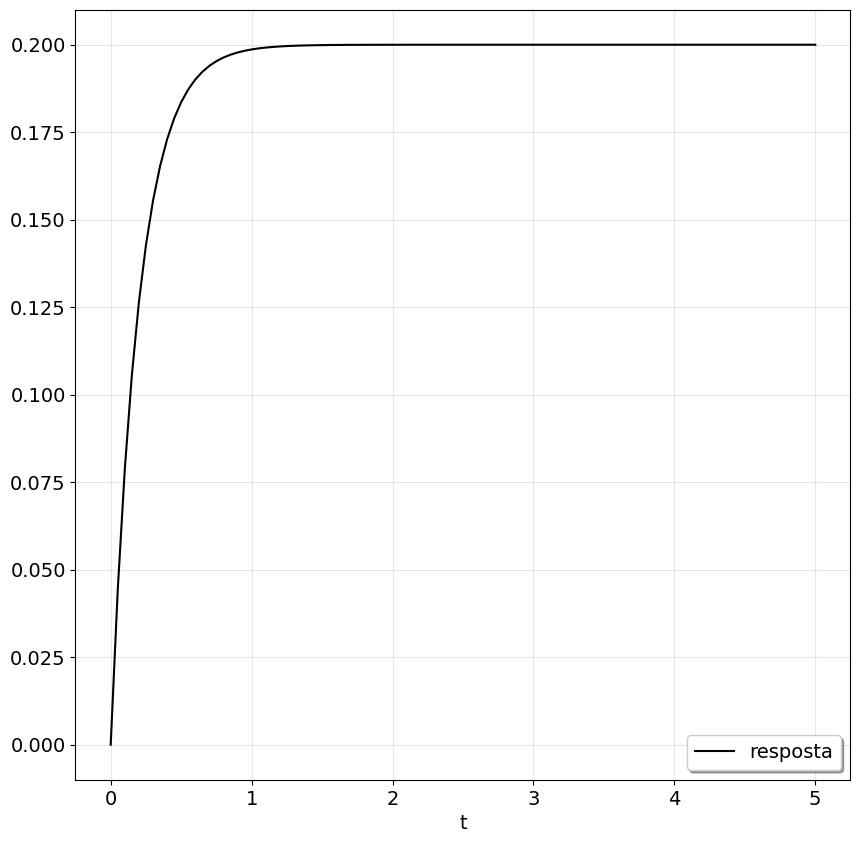

/usr/local/lib/python3.10/dist-packages/control/pzmap.py:318: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


(array([-5.+0.j]), array([], dtype=complex128))

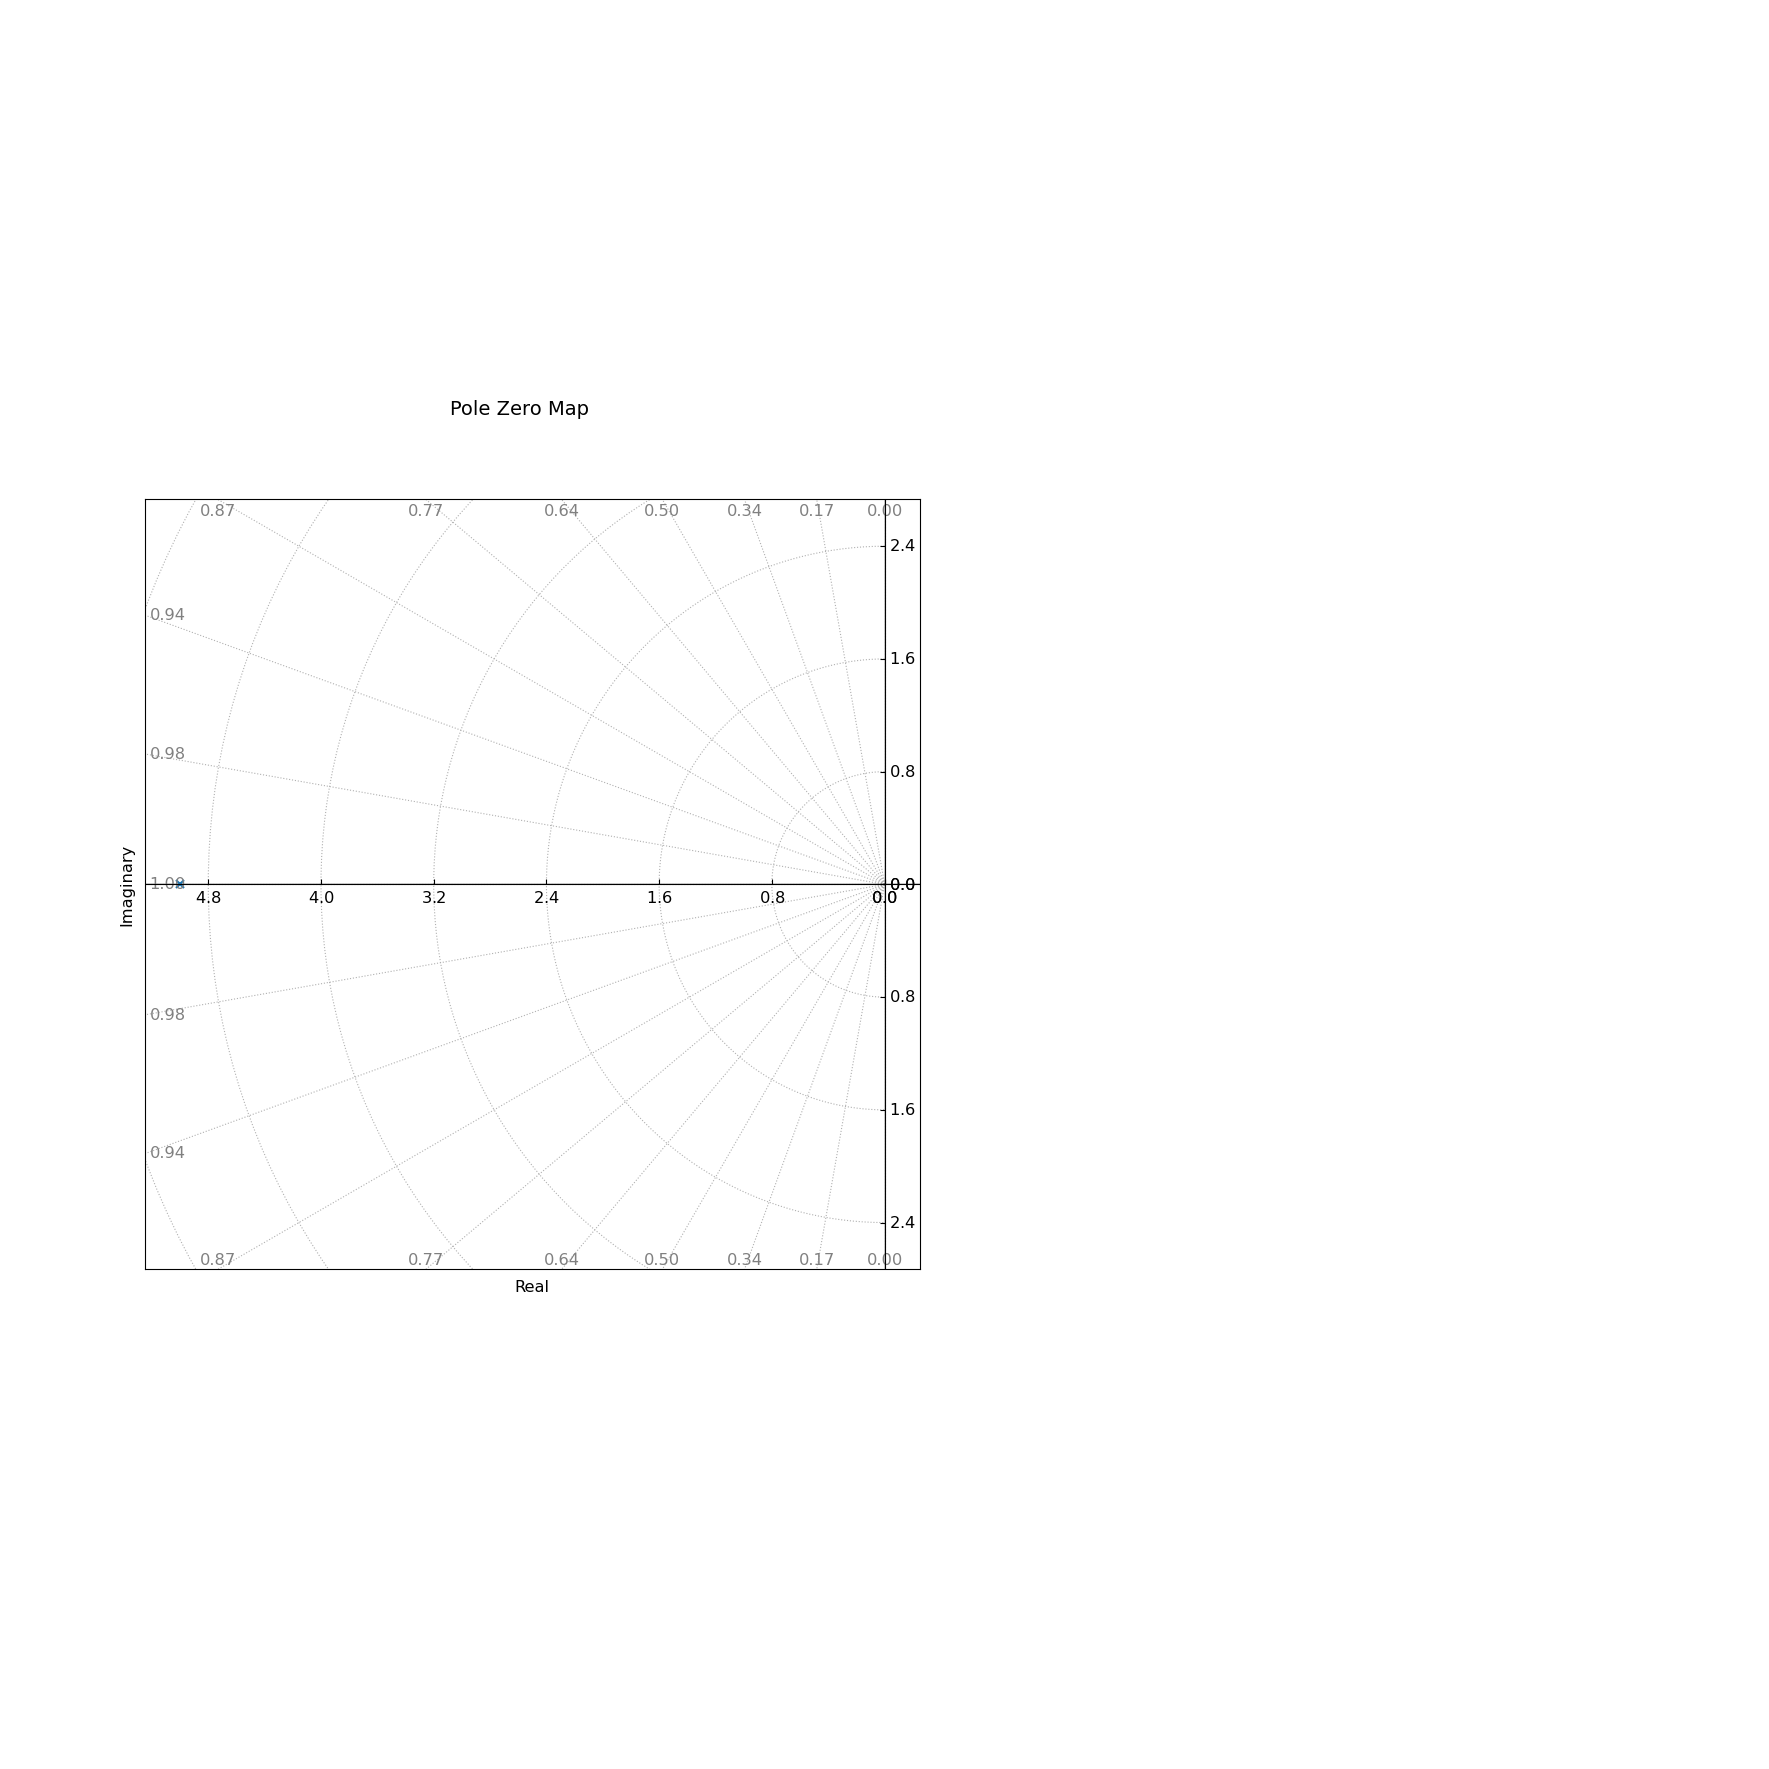

In [3]:
delta = 5
# função transferência
# https://python-control.readthedocs.io/en/latest/generated/control.TransferFunction.html
G1 = TransferFunction(1, [1,delta]) # função transferência do sistema: TransferFunction(NUMERADOR,DENOMINADOR)

print('FT =\n', G1)
print('Polos =\n\n', ctl.poles(G1), '\n') # comando que extrai os polos de um sistema
print('Zeros =\n\n', ctl.zeros(G1), '\n') # comando que extrai os zeros de um sistema

plt.figure(1)
tout, yout = ctl.step_response(G1, t, X0=0)
plt.plot(tout, yout, 'k', linewidth=1.5, label='resposta')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

plt.figure(2)
ctl.pzmap(G1, plot=True, grid=True, title='Pole Zero Map')

FT =
 
  1
-----
s - 5

Polos =

 [5.+0.j] 

Zeros =

 [] 



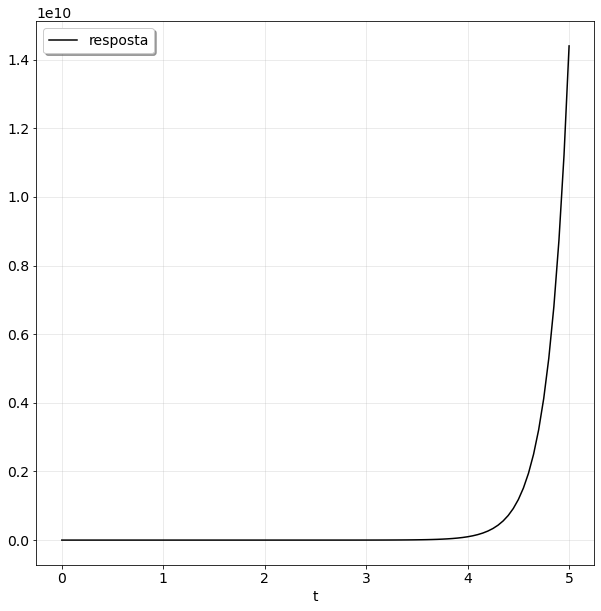

(-6.0, 6.0)

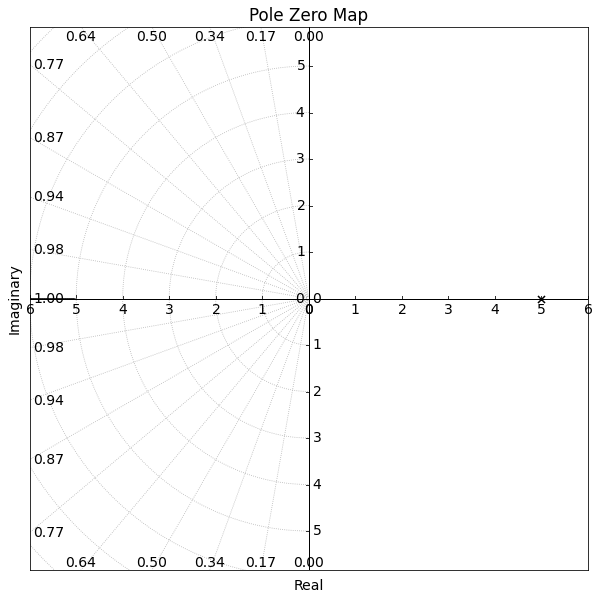

In [ ]:
delta = -5
G2 = TransferFunction(1, [1,delta]) # função transferência do sistema: TransferFunction(NUMERADOR,DENOMINADOR)

print('FT =\n', G2)
print('Polos =\n\n', ctl.pole(G2), '\n')
print('Zeros =\n\n', ctl.zero(G2), '\n')

plt.figure(3)
tout, yout = ctl.step_response(G2, t, X0=0)
plt.plot(tout, yout, 'k', linewidth=1.5, label='resposta')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

plt.figure(4)
ctl.pzmap(G2, plot=True, grid=True, title='Pole Zero Map')

plt.xlim([-6, 6]) # consertar 'números empilhados' no semiplano esquerdo

FT =
 
   2 s + 10
---------------
s^2 + 10 s + 50

Polos =

 [-5.+5.j -5.-5.j] 

Zeros =

 [-5.+0.j] 



/usr/local/lib/python3.8/dist-packages/control/xferfcn.py:1047: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
/usr/local/lib/python3.8/dist-packages/control/xferfcn.py:1077: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly
/usr/local/lib/python3.8/dist-packages/control/statesp.py:114: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.array(data, dtype=float)


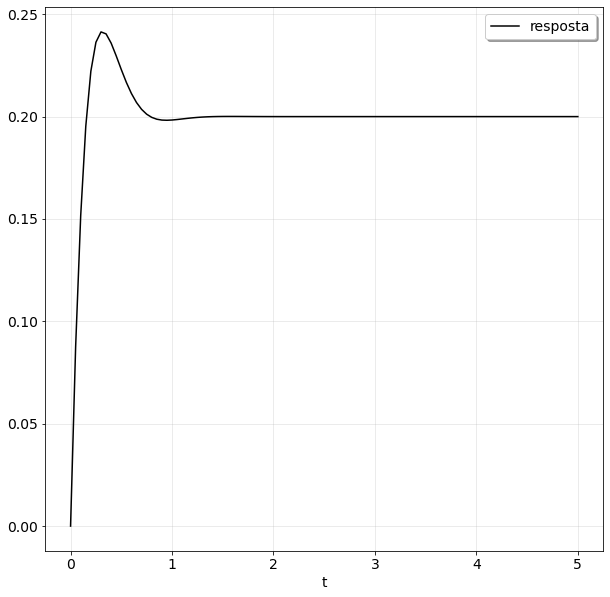

/usr/local/lib/python3.8/dist-packages/control/xferfcn.py:1047: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
/usr/local/lib/python3.8/dist-packages/control/xferfcn.py:1077: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly


(array([-5.+5.j, -5.-5.j]), array([-5.+0.j]))

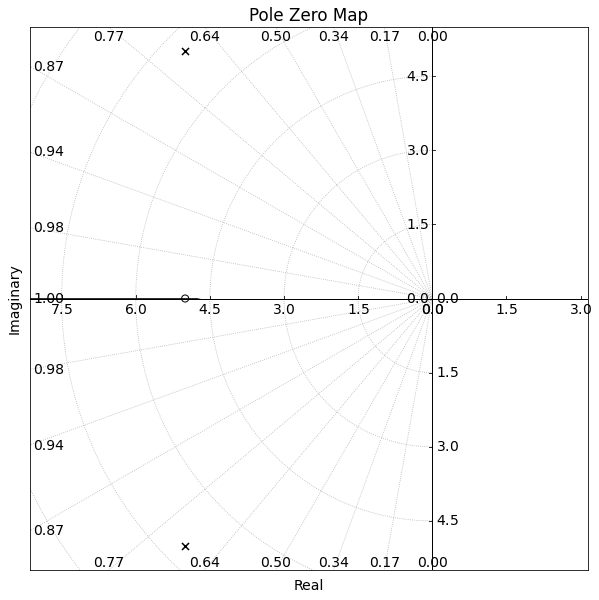

In [ ]:
delta = 5
omega = 5
k1 = 1
k2 = 1
G_ = TransferFunction(1, [1,delta-omega*1j]) # função transferência do sistema: TransferFunction(NUMERADOR,DENOMINADOR)
G  = TransferFunction(1, [1,delta+omega*1j]) # função transferência do sistema: TransferFunction(NUMERADOR,DENOMINADOR)
G3 = ctl.parallel(G_,G) # soma das FT para formar um sistema com um par de polos complexos conjugados

print('FT =\n', G3)
print('Polos =\n\n', ctl.poles(G3), '\n')
print('Zeros =\n\n', ctl.zeros(G3), '\n')

plt.figure(5)
tout, yout = ctl.step_response(G3, t, X0=0)
plt.plot(tout, yout, 'k', linewidth=1.5, label='resposta')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

plt.figure(6)
ctl.pzmap(G3, plot=True, grid=True, title='Pole Zero Map')

FT =
 
   2 s - 10
---------------
s^2 - 10 s + 50

Polos =

 [5.+5.j 5.-5.j] 

Zeros =

 [5.-0.j] 



/usr/local/lib/python3.8/dist-packages/control/statesp.py:114: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.array(data, dtype=float)


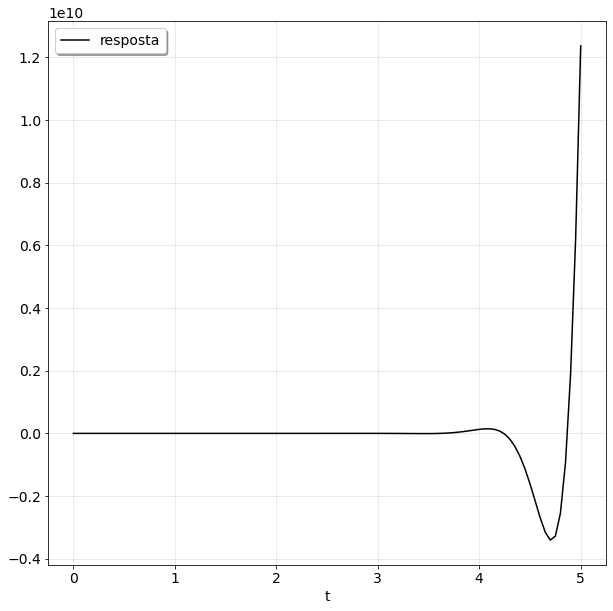

/usr/local/lib/python3.8/dist-packages/control/xferfcn.py:1047: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
/usr/local/lib/python3.8/dist-packages/control/xferfcn.py:1077: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly


(-6.0, 6.0)

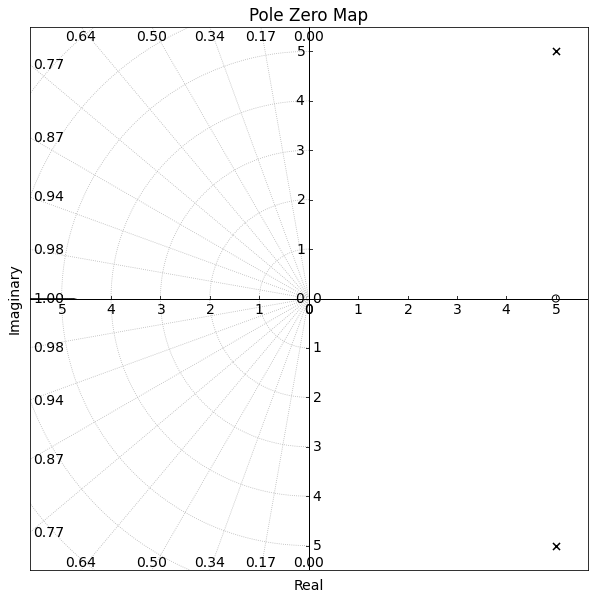

In [ ]:
delta = -5
omega = 5
k1 = 1
k2 = 1
G_ = TransferFunction(1, [1,delta-omega*1j]) # função transferência do sistema: TransferFunction(NUMERADOR,DENOMINADOR)
G  = TransferFunction(1, [1,delta+omega*1j]) # função transferência do sistema: TransferFunction(NUMERADOR,DENOMINADOR)
G4 = ctl.parallel(G_,G) # soma das FT para formar um sistema com um par de polos complexos conjugados

print('FT =\n', G4)
print('Polos =\n\n', ctl.poles(G4), '\n')
print('Zeros =\n\n', ctl.zeros(G4), '\n')

plt.figure(7)
tout, yout = ctl.step_response(G4, t, X0=0)
plt.plot(tout, yout, 'k', linewidth=1.5, label='resposta')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

plt.figure(8)
ctl.pzmap(G4, plot=True, grid=True, title='Pole Zero Map')

plt.xlim([-6, 6])

FT =
 
  2 s
--------
s^2 + 25

Polos =

 [-1.11022302e-16+5.j -1.11022302e-16-5.j] 

Zeros =

 [0.+0.j] 



/usr/local/lib/python3.8/dist-packages/control/statesp.py:114: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.array(data, dtype=float)


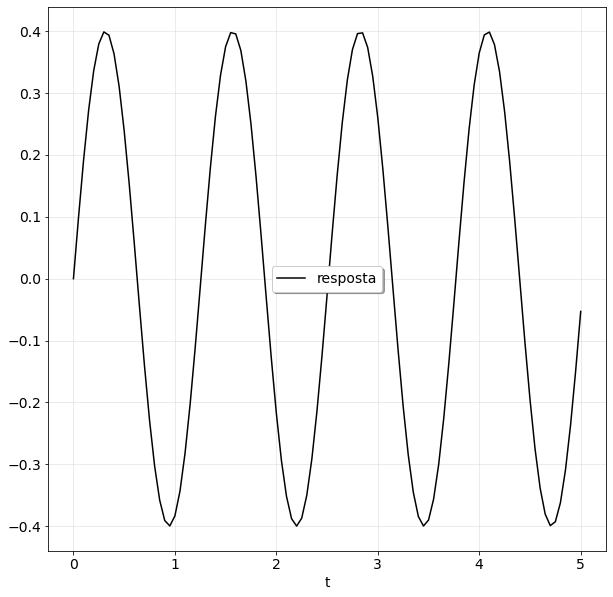

/usr/local/lib/python3.8/dist-packages/control/xferfcn.py:1047: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
/usr/local/lib/python3.8/dist-packages/control/xferfcn.py:1077: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly


(array([-1.11022302e-16+5.j, -1.11022302e-16-5.j]), array([0.+0.j]))

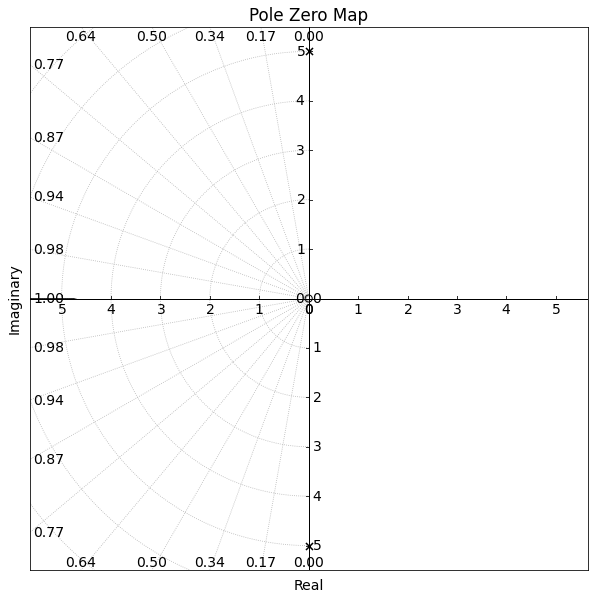

In [ ]:
delta = 0
omega = 5
k1 = 1
k2 = 1
G_ = TransferFunction(1, [1,delta-omega*1j])
G  = TransferFunction(1, [1,delta+omega*1j]) # função transferência do sistema: TransferFunction(NUMERADOR,DENOMINADOR)
G5 = ctl.parallel(G_,G) # soma das FT para formar um sistema com um par de polos complexos conjugados


print('FT =\n', G5)
print('Polos =\n\n', ctl.poles(G5), '\n')
print('Zeros =\n\n', ctl.zeros(G5), '\n')

plt.figure(9)
tout, yout = ctl.step_response(G5, t, X0=0)
plt.plot(tout, yout, 'k', linewidth=1.5, label='resposta')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

plt.figure(10)
ctl.pzmap(G5, plot=True, grid=True, title='Pole Zero Map')